In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy  import stats
from scipy.stats import zscore

In [58]:
df1 = pd.read_csv('dailyActivity_merged.csv')
df1

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


Berdasarkan jurnal Revisiting "How Many Steps Are Enough?" oleh TUDOR-LOCKE, CATRINE1; HATANO, YOSHIRO3; PANGRAZI, ROBERT P.2; KANG, MINSOO4.

Diketahui dalam jurnal tersebut, pembagian langkah (steps) seringkali dikategorikan berdasarkan total langkah yang diambil dalam sehari. Berikut adalah pembagian umum yang sering digunakan berdasarkan total langkah:

Sedentary (Tidak Aktif): 0 - 4999 langkah <br>
Low Active (Aktif Rendah): 5000 - 7499 langkah<br>
Somewhat Active (Aktif Sedang): 7500 - 9999 langkah<br>
Active (Aktif): 10,000 - 12,499 langkah<br>
Highly Active (Sangat Aktif): 12,500 langkah ke atas

Pembagian ini membantu dalam memahami tingkat aktivitas fisik individu dan dapat digunakan untuk menetapkan tujuan aktivitas sehari-hari.

Maka akan dilakukan penambahan kolom tingkat aktif tidaknya berdasarkan total steps yang telah ditempuh pada hari tersebut

In [116]:
def categorize_steps(steps):
    if steps < 5000:
        return 'Sedentary'
    elif 5000 <= steps < 7500:
        return 'Low Active'
    elif 7500 <= steps < 10000:
        return 'Somewhat Active'
    elif 10000 <= steps < 12500:
        return 'Active'
    else:
        return 'Highly Active'

group_order = ['Highly Active','Active','Somewhat Active','Low Active','Sedentary']
df1 ['ActiveGroup'] = df1['TotalSteps'].apply(categorize_steps)
df1 ['ActiveGroup'] = pd.Categorical(df1['ActiveGroup'], categories=group_order, ordered=True)
df1

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveGroup,Day
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,Highly Active,Tuesday
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,Active,Wednesday
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,Active,Thursday
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,Somewhat Active,Friday
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,Highly Active,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,Active,Sunday
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,Highly Active,Monday
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,Active,Tuesday
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,Highly Active,Wednesday


In [117]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

Mengubah tipe kolom ActivityDate menjadi datetime, kemudian menambahkan kolom Day dengan mengkonversi kolom ActivityDate menjadi hari.

In [118]:
df1['ActivityDate'] = pd.to_datetime(df1['ActivityDate'])

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df1['Day'] = pd.Categorical(df1['ActivityDate'].dt.day_name(), categories=day_order, ordered=True)
df1

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveGroup,Day
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,Highly Active,Tuesday
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,Active,Wednesday
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,Active,Thursday
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,Somewhat Active,Friday
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,Highly Active,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,Active,Sunday
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,Highly Active,Monday
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,Active,Tuesday
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,Highly Active,Wednesday


In [119]:
ActiveMinutes = df1[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean().sort_values(ascending=False)
ActiveMinutes

SedentaryMinutes        991.210638
LightlyActiveMinutes    192.812766
VeryActiveMinutes        21.164894
FairlyActiveMinutes      13.564894
dtype: float64

C:\Users\tofan\AppData\Local\Temp\ipykernel_25272\544750564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(ActiveMinutes, palette='Blues')


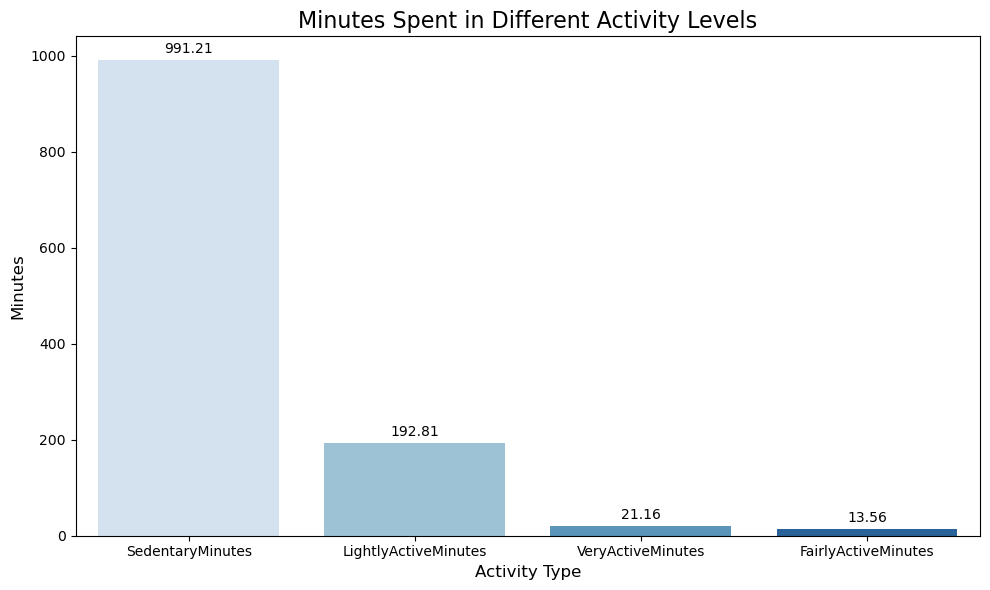

In [120]:
# Membuat bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(ActiveMinutes, palette='Blues')

# Menambahkan label value di atas bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', 
                     fontsize=10, color='black', 
                     xytext=(0, 5), 
                     textcoords='offset points')

# Menambahkan judul dan label sumbu
plt.title('Minutes Spent in Different Activity Levels', fontsize=16)
plt.xlabel('Activity Type', fontsize=12)
plt.ylabel('Minutes', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [164]:
# Menghitung jumlah ActiveGroup untuk setiap Id
Group = df1.groupby('Id')['ActiveGroup'].value_counts().unstack(fill_value=0)

# Menambahkan total count untuk setiap Id pada kolom paling kanan
Group['TotalCount'] = Group.sum(axis=1)
Group

ActiveGroup,Highly Active,Active,Somewhat Active,Low Active,Sedentary,TotalCount
Id,,,,,,
1503960366,15,12,3,0,1,31
1624580081,1,1,4,8,17,31
1644430081,4,3,6,6,11,30
1844505072,0,0,2,3,26,31
1927972279,0,0,0,0,31,31
2022484408,9,18,1,2,1,31
2026352035,0,3,4,9,15,31
2320127002,0,1,0,15,15,31
2347167796,2,7,4,4,1,18


In [145]:
Group.describe()

ActiveGroup,Highly Active,Active,Somewhat Active,Low Active,Sedentary,TotalCount
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,4.363636,4.818182,4.939394,5.181818,9.181818,28.484848
std,5.993842,5.120147,4.743017,4.194152,8.542008,5.657524
min,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
25%,0.000000,1.000000,1.000000,2.000000,3.000000,29.000000
50%,1.000000,3.000000,4.000000,4.000000,6.000000,31.000000
75%,7.000000,7.000000,7.000000,8.000000,15.000000,31.000000
max,22.000000,18.000000,20.000000,16.000000,31.000000,31.000000


In [165]:
def categorize_user(use):
    if use < 10:
        return 'Inactive'
    elif 10 <= use <= 20:
        return 'Casually Use'
    else:
        return 'Frequently Use'

Group['UseFrequency'] = Group['TotalCount'].apply(categorize_user)
Group = Group.reset_index()
Group

ActiveGroup,Id,Highly Active,Active,Somewhat Active,Low Active,Sedentary,TotalCount,UseFrequency
0,1503960366,15,12,3,0,1,31,Frequently Use
1,1624580081,1,1,4,8,17,31,Frequently Use
2,1644430081,4,3,6,6,11,30,Frequently Use
3,1844505072,0,0,2,3,26,31,Frequently Use
4,1927972279,0,0,0,0,31,31,Frequently Use
5,2022484408,9,18,1,2,1,31,Frequently Use
6,2026352035,0,3,4,9,15,31,Frequently Use
7,2320127002,0,1,0,15,15,31,Frequently Use
8,2347167796,2,7,4,4,1,18,Casually Use
9,2873212765,0,0,20,8,3,31,Frequently Use


C:\Users\tofan\AppData\Local\Temp\ipykernel_25272\1773443321.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='UseFrequency', y='Count', data=frequency_counts, palette='Blues')


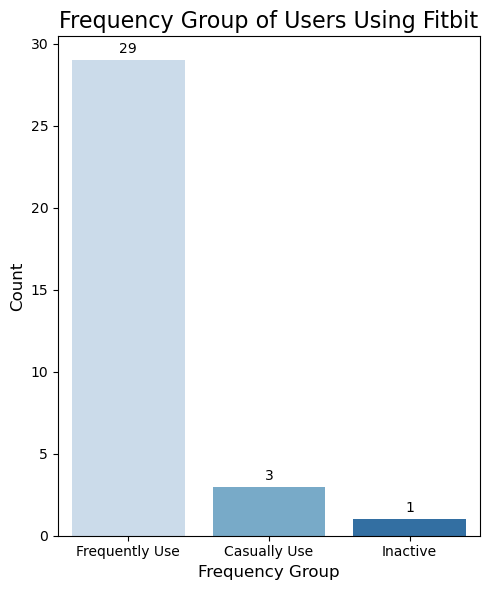

In [158]:
# Menghitung frekuensi
frequency_counts = Group['UseFrequency'].value_counts().reset_index()
frequency_counts.columns = ['UseFrequency', 'Count']

# Membuat bar plot
plt.figure(figsize=(5, 6))
barplot = sns.barplot(x='UseFrequency', y='Count', data=frequency_counts, palette='Blues')

# Menambahkan label value di atas bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.0f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', 
                     fontsize=10, color='black', 
                     xytext=(0, 5), 
                     textcoords='offset points')

# Menambahkan judul dan label sumbu
plt.title('Frequency Group of Users Using Fitbit', fontsize=16)
plt.xlabel('Frequency Group', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [169]:
#drop baris casual & inactive
Group = Group[Group['UseFrequency'] == 'Frequently Use']
Group


ActiveGroup,Id,Highly Active,Active,Somewhat Active,Low Active,Sedentary,UseFrequency
0,1503960366,15,12,3,0,1,Frequently Use
1,1624580081,1,1,4,8,17,Frequently Use
2,1644430081,4,3,6,6,11,Frequently Use
3,1844505072,0,0,2,3,26,Frequently Use
4,1927972279,0,0,0,0,31,Frequently Use
5,2022484408,9,18,1,2,1,Frequently Use
6,2026352035,0,3,4,9,15,Frequently Use
7,2320127002,0,1,0,15,15,Frequently Use
9,2873212765,0,0,20,8,3,Frequently Use
11,3977333714,9,13,4,3,1,Frequently Use


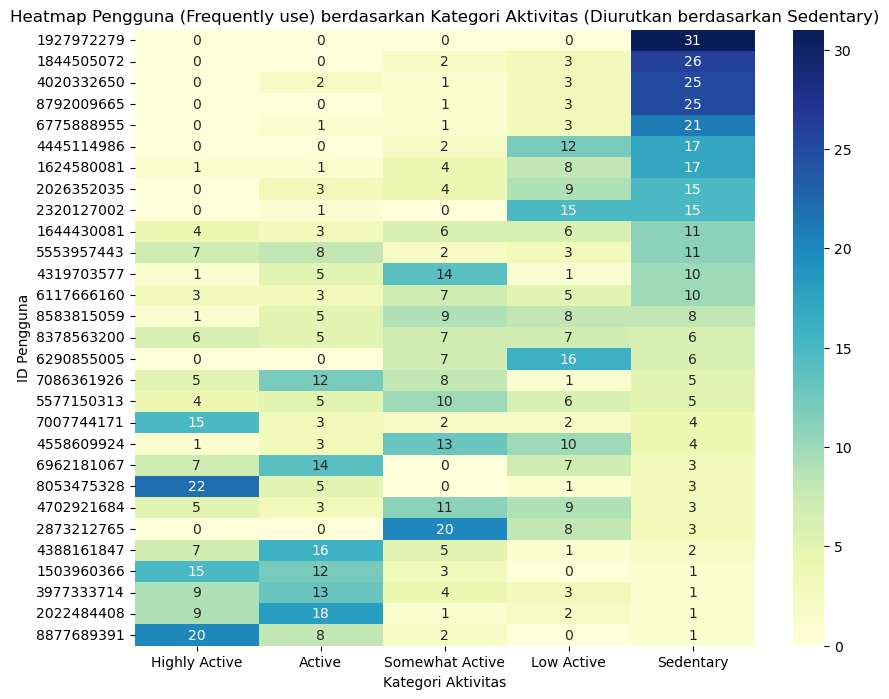

In [174]:
# Mengurutkan DataFrame berdasarkan kolom 'Sedentary' dari yang tertinggi ke terendah
df_sorted = Group.sort_values(by='Sedentary', ascending=False)

# Menentukan indeks dan kolom untuk heatmap
heatmap_data = df_sorted[['Highly Active', 'Active', 'Somewhat Active', 'Low Active', 'Sedentary']]

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu', cbar=True, 
            xticklabels=['Highly Active', 'Active', 'Somewhat Active', 'Low Active', 'Sedentary'], 
            yticklabels=df_sorted['Id'])
plt.title('Heatmap Pengguna (Frequently use) berdasarkan Kategori Aktivitas (Diurutkan berdasarkan Sedentary)')
plt.xlabel('Kategori Aktivitas')
plt.ylabel('ID Pengguna')
plt.show()

In [63]:
avg_steps_per_day = df1.groupby('Day')['TotalSteps'].mean()
avg_steps_per_day

C:\Users\tofan\AppData\Local\Temp\ipykernel_25272\840352320.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_steps_per_day = df1.groupby('Day')['TotalSteps'].mean()


Day
Monday       7780.866667
Tuesday      8125.006579
Wednesday    7559.373333
Thursday     7405.836735
Friday       7448.230159
Saturday     8152.975806
Sunday       6933.231405
Name: TotalSteps, dtype: float64

In [64]:
avg_distance_per_day = df1.groupby('Day')['TotalDistance'].mean()
avg_distance_per_day

C:\Users\tofan\AppData\Local\Temp\ipykernel_25272\2836854139.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_distance_per_day = df1.groupby('Day')['TotalDistance'].mean()


Day
Monday       5.552917
Tuesday      5.832237
Wednesday    5.488333
Thursday     5.312245
Friday       5.309921
Saturday     5.854677
Sunday       5.027190
Name: TotalDistance, dtype: float64

C:\Users\tofan\AppData\Local\Temp\ipykernel_25272\3040020523.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(days, rotation=0)


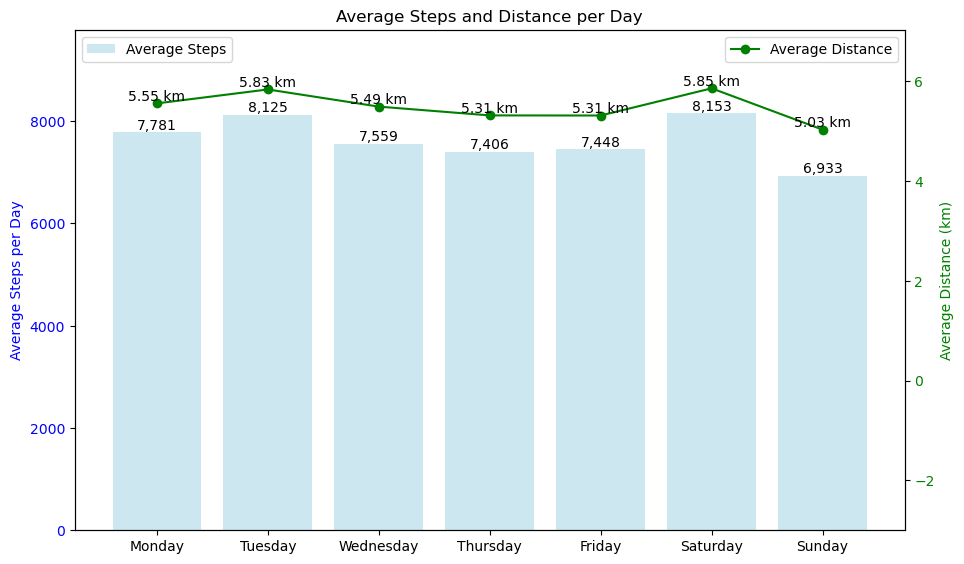

In [162]:
# Mengatur urutan hari secara manual
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Mengubah kolom 'Day' menjadi kategori dengan urutan yang telah ditentukan
df1['Day'] = pd.Categorical(df1['Day'], categories=day_order, ordered=True)

# Mengurutkan berdasarkan kategori
df1_sorted = df1.sort_values('Day')

# days akan mengikuti urutan yang benar
days = df1_sorted['Day'].unique()

# Membuat plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart untuk rata-rata langkah per hari
bars = ax1.bar(days, avg_steps_per_day, color='lightblue', label='Average Steps', alpha=0.6)
ax1.set_ylabel('Average Steps per Day', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Memperbaiki label sumbu x
ax1.set_xticklabels(days, rotation=0)

# Menambahkan nilai di atas setiap bar (untuk memperjelas data)
for bar in bars:
    ax1.annotate(f'{bar.get_height():,.0f}',  # Menampilkan angka dengan format koma
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom')

# Menetapkan batas maksimum sumbu y untuk bar chart
ax1.set_ylim(0, max(avg_steps_per_day) * 1.2)  # Tambah 20% untuk ruang di atas

# Membuat axis kedua untuk line chart
ax2 = ax1.twinx()

# Line chart untuk jarak rata-rata per hari
line = ax2.plot(days, avg_distance_per_day, color='green', marker='o', label='Average Distance')

# Menambahkan nilai di samping setiap titik pada line chart
for i, value in enumerate(avg_distance_per_day):
    ax2.annotate(f'{value:.2f} km', 
                 (i, value), 
                 ha='center', va='bottom')

ax2.set_ylabel('Average Distance (km)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Menetapkan batas maksimum sumbu y untuk line chart
ax2.set_ylim(-3, max(avg_distance_per_day) * 1.2)

# Menambahkan judul dan grid
plt.title('Average Steps and Distance per Day')
ax1.grid(False)

# Menambahkan legenda untuk kedua grafik
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Menampilkan plot dengan layout yang rapi
plt.tight_layout(pad=2)
plt.show()


In [79]:
df2 = pd.read_csv('hourlySteps_merged.csv')
df2['Id'].unique() - df1['Id'].unique()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [80]:
df2

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0
...,...,...,...
22094,8877689391,5/12/2016 10:00:00 AM,514
22095,8877689391,5/12/2016 11:00:00 AM,1407
22096,8877689391,5/12/2016 12:00:00 PM,3135
22097,8877689391,5/12/2016 1:00:00 PM,307


In [82]:
# Mengonversi kolom 'ActivityHour' ke format datetime jika belum dilakukan
df2['ActivityHour'] = pd.to_datetime(df2['ActivityHour'])

# Membuat kolom baru untuk 'Hour' dari 'ActivityHour'
df2['Hour'] = df2['ActivityHour'].dt.hour

# Membuat kolom baru untuk 'Day' dari 'ActivityHour'
df2['Day'] = pd.Categorical(df2['ActivityHour'].dt.day_name(), categories=day_order, ordered=True)
df2

,Id,ActivityHour,StepTotal,Hour,Day
0,1503960366,2016-04-12 00:00:00,373,0,Tuesday
1,1503960366,2016-04-12 01:00:00,160,1,Tuesday
2,1503960366,2016-04-12 02:00:00,151,2,Tuesday
3,1503960366,2016-04-12 03:00:00,0,3,Tuesday
4,1503960366,2016-04-12 04:00:00,0,4,Tuesday
...,...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,514,10,Thursday
22095,8877689391,2016-05-12 11:00:00,1407,11,Thursday
22096,8877689391,2016-05-12 12:00:00,3135,12,Thursday
22097,8877689391,2016-05-12 13:00:00,307,13,Thursday


C:\Users\tofan\AppData\Local\Temp\ipykernel_25272\4089931817.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df2.groupby(['Day', 'Hour'])['StepTotal'].mean().reset_index()
C:\Users\tofan\AppData\Local\Temp\ipykernel_25272\4089931817.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df_grouped.pivot_table(index='Hour', columns='Day', values='StepTotal')


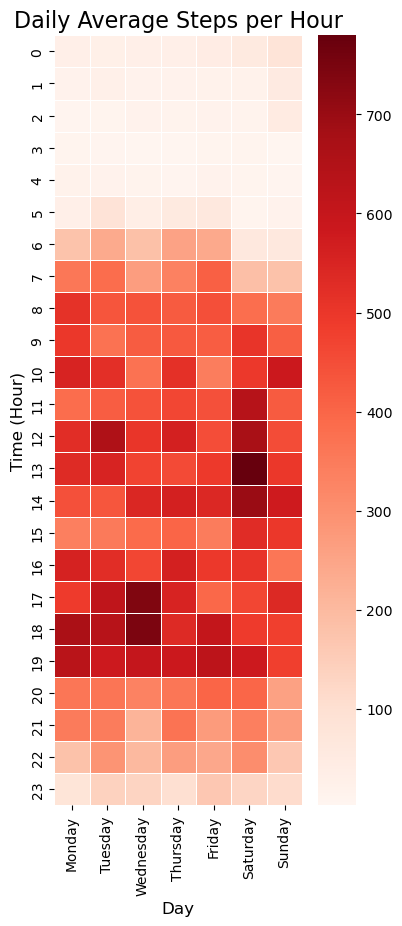

In [90]:
# Menghitung rata-rata langkah per jam untuk setiap hari dalam seminggu
df_grouped = df2.groupby(['Day', 'Hour'])['StepTotal'].mean().reset_index()

# Membuat pivot table untuk menyiapkan data bagi heatmap
df_pivot = df_grouped.pivot_table(index='Hour', columns='Day', values='StepTotal')

# Mengurutkan hari secara manual agar urutan sesuai
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_pivot = df_pivot[ordered_days]

# Plotting heatmap
plt.figure(figsize=(4, 10))
sns.heatmap(df_pivot, cmap='Reds', annot=False, linewidths=.5, yticklabels=1)

# Menambahkan judul dan label sumbu
plt.title('Daily Average Steps per Hour', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Time (Hour)', fontsize=12)

# Menampilkan heatmap
plt.show()

C:\Users\tofan\AppData\Local\Temp\ipykernel_25272\3096883178.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df2.groupby(['Hour', 'Day'])['StepTotal'].mean().reset_index()
C:\Users\tofan\AppData\Local\Temp\ipykernel_25272\3096883178.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df_grouped.pivot_table(index='Day', columns='Hour', values='StepTotal')


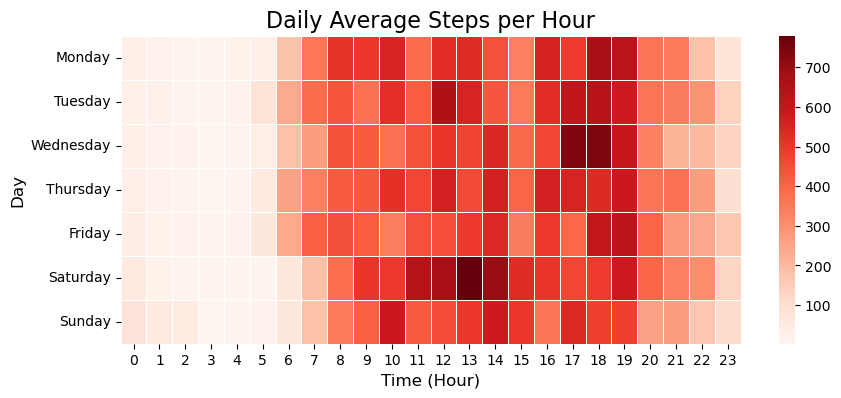

In [92]:
# Menghitung rata-rata langkah per jam untuk setiap hari dalam seminggu
df_grouped = df2.groupby(['Hour', 'Day'])['StepTotal'].mean().reset_index()

# Membuat pivot table untuk menyiapkan data bagi heatmap
df_pivot = df_grouped.pivot_table(index='Day', columns='Hour', values='StepTotal')

# Mengurutkan hari secara manual agar urutan sesuai
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_pivot = df_pivot.reindex(ordered_days)

# Plotting heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df_pivot, cmap='Reds', annot=False, linewidths=.5)

# Menambahkan judul dan label sumbu
plt.title('Daily Average Steps per Hour', fontsize=16)
plt.xlabel('Time (Hour)', fontsize=12)
plt.ylabel('Day', fontsize=12)

# Menampilkan heatmap
plt.show()
